## Titanic Classification using Logistic Regression
* Tatanic Dataset을 정제하고 훈련하는 과정을 코딩해봅시다.

In [ ]:
# 데이터 다운로드
! wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1NdCDgf8g99c6ug_yYFHdHNHWEtoGOmUz' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1NdCDgf8g99c6ug_yYFHdHNHWEtoGOmUz" -O train.csv && rm -rf ~/cookies.txt
! wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1nIWM6BOp8Xu1rlF6AUQCSfelPuiBu7tF' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1nIWM6BOp8Xu1rlF6AUQCSfelPuiBu7tF" -O test.csv && rm -rf ~/cookies.txt

In [87]:
import pandas as pd

# Titanic Dataset을 다운로드 받고, 압축을 풀어 dataframe으로 불러오기
# Code Here

In [88]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Analysis

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

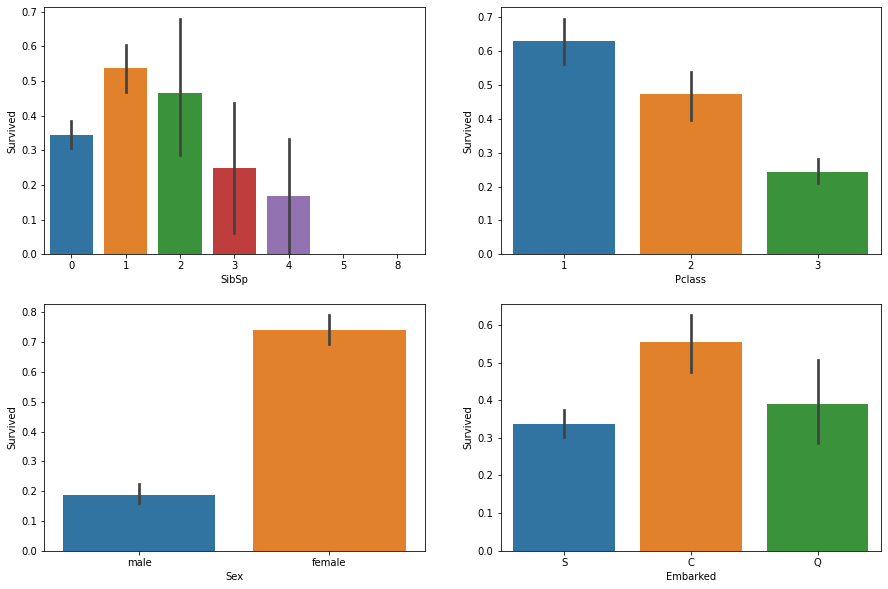

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# 여러 피쳐의 분포도를 확인하기 위해 서브플랏을 그리시오
plt.figure(figsize=(15, 10))
# Code Here!
plt.show()

## Processing Data
* 이전까지 활용한 데이터는 실제 데이터가 아닌, scikit-learn에서 제공한 데이터였다.
* 그래서 전처리를 필요로 하지 않는 쉬운 데이터였다.
* 하지만, 실제로 우리가 연구/개발을 하면서 마주하게 될 데이터는 전처리를 필요로 한다.
* 실제 머신러닝 개발에서 10%만 머신러닝 관련 코드이고, 90%는 전처리/데이터수집/관리 등과 관련된 코드라고 한다.

### 결측값 처리
* 가장 먼저 시도해볼 방법은 결측값을 제거하는 것이다.
* 결측값은 데이터가 없는 것으로, 데이터 수집/보관시 여러 문제들로 인하여 데이터가 사라지는 것이다.
* pandas를 사용할 경우, isna()를 통해서 결측값 존재 여부를 확인해볼 수 있다.

#### 1. 결측값 0으로 처리
* 결측값이 존재하면, 머신러닝에서 에러를 발생시키기 때문에, 결측값을 0으로 채우는 것이다.

#### 2. 결측값을 평균으로 처리
* 결측값을 0으로 채우게 되면, 그로 인해 잘못된 데이터가 학습될 가능성이 크다.
* 결측값을 평균으로 처리하게 되면, 머신러닝 학습시, 해당 데이터의 영향을 최소화할 수 있다.

#### 3. 빈도 높은 값으로 결측값 채우기
* 결측값이 실수/정수 데이터가 아닌 경우, 가장 빈도 높은 값으로 채우기도 한다.

In [90]:
# 훈련데이터에서의 결측 값 데이터 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [91]:
# 테스트 데이터에서의 결측값 확인

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

* Age는 연속성있는 데이터이기 때문에, 평균으로, Embarked는 빈도 높은 값으로 채워준다.
* Cabin은 훈련에 영향을 줄 정도로 양이 많기 때문에 사용하지 않도록 한다.

In [108]:
# 나이/요금의 경우 결측값을 평균으로, Embarked의 경우 결측값을 최빈값으로 설정한다.
# 훈련 데이터에서 나이 결측값 채우기



# 테스트 데이터에서 나이 결측값 채우기



# 테스트 데이터에서 Fare 결측값 채우기



# 훈련 데이터에서 Embarked 결측값 채우기



In [109]:
train_df.isna().sum() # 잘 바뀌었는지 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## 데이터 전처리하기

### 1. 실수값 변환
* 실수값이 아닌 데이터의 경우, 실수값으로 변환해야한다.
* Sex, Embarked는 문자열로 데이터가 구성되어 있기 때문에 실수값으로 데이터를 변환해준다.

### 2. Normalization 수행
* 특정 데이터만 데이터의 범위가 너무 클 경우, 머신러닝 훈련시, 범위가 큰 데이터에 영향을 크게 받는다.
* 그러므로, 사용할 모든 데이터를 0 ~ 1 사이의 값으로 변경해준다.

In [110]:
# 사용할 컬럼의 데이터만을 train_x로 복사하여 사용하기
column_to_use = ["Pclass", "Sex", "Age", "SibSp","Parch", "Fare", "Embarked"]

# Code Here

### copy()를 써주는 이유! (참고)
* 파이썬의 리스트, 판다스 객체와 같은 경우, 변수 자체에 값을 할당하는 C언어와 달리, 변수에 데이터가 저장된 위치를 저장한다.
* 그러므로, copy()를 쓰지 않을 경우, train에 train_df가 복사되어 들어가는게 아니라, train_df의 위치가 저장되어, train_df와 train이 결국에는 같은 데이터를 가르키게 되는 경우가 발생한다.
* 그러므로, train을 변형하면 train_df까지 바꾸어야 할지, train변수를 복사한것으로 간주해야 할지 모르는 문제가 발생한다.
* 그래서 copy() 매써드를 통해 train변수에 train_df의 위치를 저장하는 게 아니라, train_df의 데이터 자체를 복사해 넣는 것이다.

In [111]:
# String 데이터인 성별(Sex)와 Embarked를 정수로 치환한다.
# Apply, lambda function 활용.

In [112]:
train_y = train_df.Survived
# test_df는 실제 테스트용 데이터이기 때문에, y값에 해당하는 Survived가 존재하지 않는다.

In [113]:
train_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [114]:
from sklearn.preprocessing import StandardScaler

# Standard Deviation 을 활용한 Standard Scaler를 통해 데이터를 0 ~ 1 사이의 값으로 변환한다.
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
ss = StandardScaler()
# Code Here!

In [115]:
train_x.shape, test_x.shape

((891, 7), (418, 7))

## Model Training
* train_df에서 validation 데이터를 분리해준다.

In [116]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

In [117]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression을 불러와서 훈련과 분류를 수행한다.

print(f"Accuray: {lr.score(val_x, val_y):.2f}")

Accuray: 0.79


Text(0.5, 1.0, 'Feature Importance')

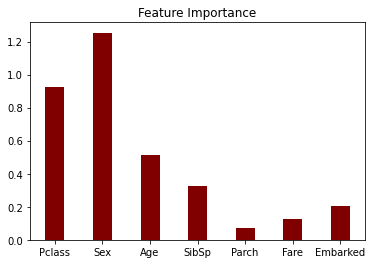

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# Logistic Regression의 Coefficient를 바 차트로 시각화한다.
# Code Here!
